This notebook will simulate the effect of different parameters initialisation scenarios. The main point is to understand the impact on the signal propagation through the network and the basic know-how to analyse it.

Initial imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# acess to Keras API
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import Zeros, RandomNormal, glorot_normal, glorot_uniform

# imports for random generators
import random

Define the shape of the input and the first simulated hidden layer

In [2]:
data_in = 784       # just like with the MNIST data set
n_neurons_h1 = 1024  # that is completely arbitrary number, but large enough to create cool plots

Here we define the initialisation

In [41]:
bias_init = Zeros()
# get ranodm seed for the generator - change the generator here!!
one_seed = int(random.random()*1000000)
print(' --> random seed: ', one_seed)
# weight_init = RandomNormal(mean = 0.0, stddev = 1.0, seed = one_seed)
# weight_init = glorot_normal(seed = one_seed)
weight_init = glorot_uniform(seed = one_seed)
# a nice trick to use this in a stand-alone mode, usually we will pass this object to the model builder
values = weight_init(shape=(1, 1024))
print( values )

 --> random seed:  720978
tf.Tensor(
[[-0.06624453 -0.01593024  0.03710254 ... -0.01109028  0.0093802
  -0.03341909]], shape=(1, 1024), dtype=float32)


 --> Plot these numbers - each time you run it should be getting different plot!! 


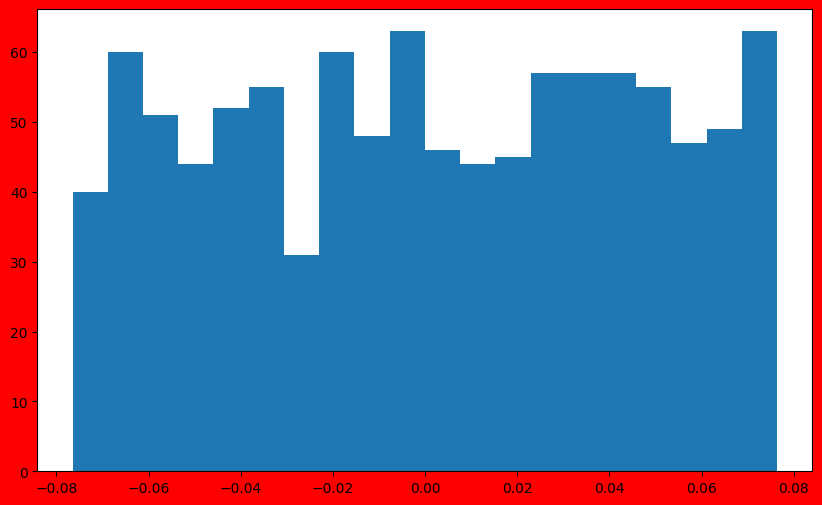

In [42]:
print(' --> Plot these numbers - each time you run it should be getting different plot!! ')
plt.figure(figsize=(10,6),facecolor='red',edgecolor='blue')
_ = plt.hist(values, bins = 20)

In [53]:
# Build a simulated network for testing initialisation effects
sim_model = Sequential()
sim_model.add(Dense(n_neurons_h1, input_dim = data_in, kernel_initializer = weight_init, bias_initializer = bias_init))
# Define the type of neurons separately - we will use different ones here!!
# sim_model.add(Activation('sigmoid'))
# sim_model.add(Activation('tanh'))
sim_model.add(Activation('relu'))

In [54]:
# Simulate the input signal for the network (remember the shape we assumed!)
data = np.random.random((1, data_in))

In [55]:
# To check the performance of training we propagate forward
sim_response = sim_model.predict(data)

1/1 [==============================] - 0s 45ms/step


In [56]:
type( sim_response )

numpy.ndarray

 --> Plot the simulated response 


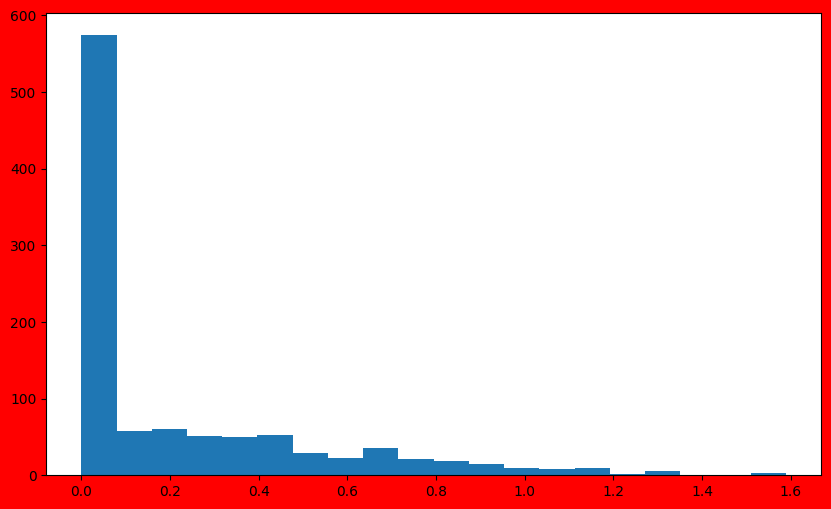

In [57]:
print(' --> Plot the simulated response ')
plt.figure(figsize=(10,6),facecolor='red',edgecolor='blue')
_ = plt.hist(np.transpose(sim_response), bins = 20)
# note the strong tendency to saturate the neuron response for sigmoid and tanh!!
# situation is a bit better with the relu - since we cannot saturate it for the large z values
# with glorot initialisation we should see a very nice 'normal-like' distribution of weights